In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lire les résultats depuis le fichier CSV
df = pd.read_csv("../finetuning/finetuning_results_2.csv")
print(df.head())

# Supprimer les espaces au début et à la fin des noms de colonnes
df.columns = df.columns.str.strip()

print(df.columns)

   entities   mr_switch   mr_move   mr_create   result
0        10           1        10           1   101530
1        10           1        10           2   102573
2        10           1        13           1   102000
3        10           1        13           2   100598
4        10           1        16           1   103038
Index(['entities', 'mr_switch', 'mr_move', 'mr_create', 'result'], dtype='object')


In [2]:

# Normaliser la taille des bulles pour éviter qu'elles ne deviennent trop grandes
# On divise par un facteur pour réduire la taille (ajustez selon vos besoins)
# sizes = df['entities'] / 2


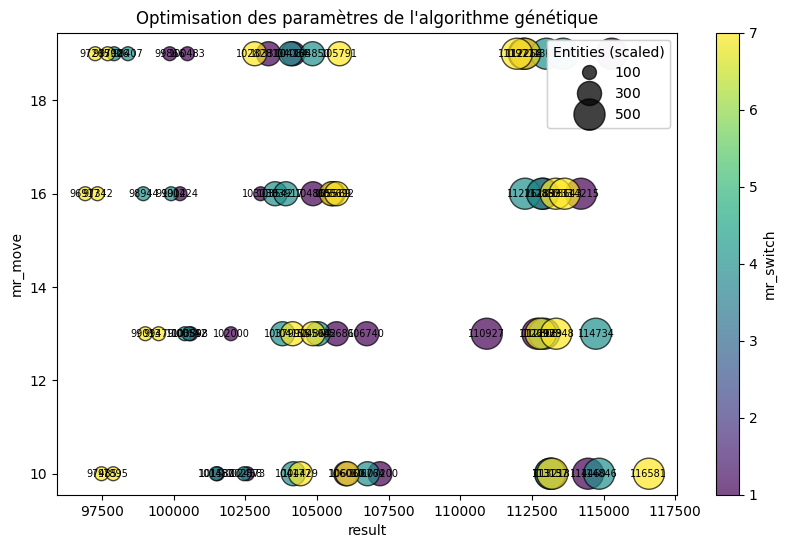

In [3]:

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Créer le scatter plot (graphique à bulles)
scatter = ax.scatter(
    x=df['result'],
    y=df['mr_move'],
    s=df['entities'] * 10,
    c=df['mr_switch'],
    cmap='viridis',
    alpha=0.7,
    edgecolors="black"
)

# Ajouter les valeurs de 'result' au centre des bulles
for i, row in df.iterrows():
    ax.text(
        row['result'], row['mr_move'], str(row['result']),
        ha='center', va='center', color='black', fontsize=7
    )

# Ajouter une barre de couleur pour le 'result'
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('mr_switch')

# Ajouter des labels et un titre
ax.set_xlabel('result')
ax.set_ylabel('mr_move')
ax.set_title('Optimisation des paramètres de l\'algorithme génétique')

# Afficher la légende pour la taille des bulles
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.7)
legend2 = ax.legend(
    handles, labels,
    loc="upper right",
    title="Entities (scaled)"
)

# Ajouter une légende pour la taille des bulles
ax.add_artist(legend2)

# Afficher le graphique
plt.show()


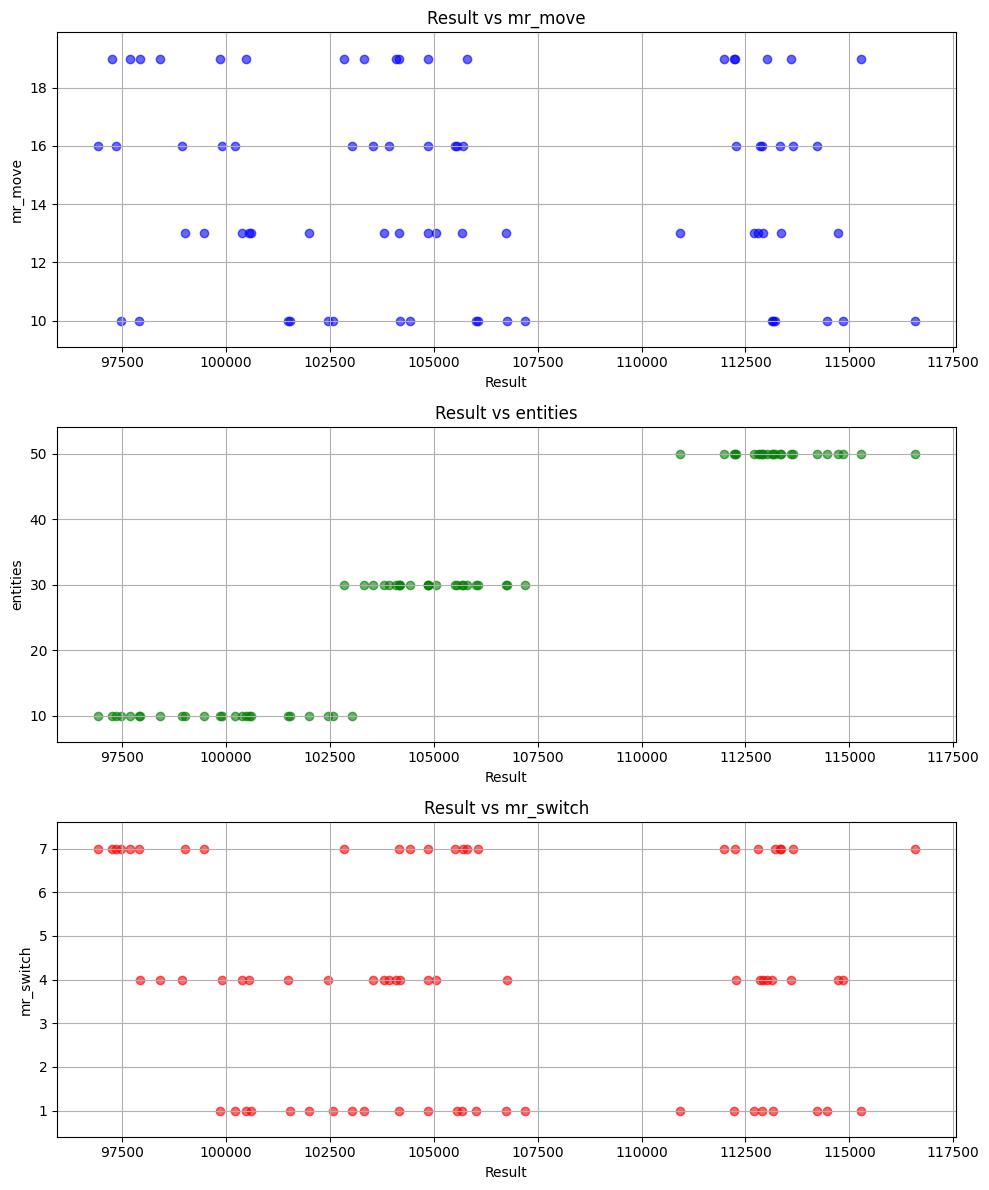

In [4]:

# Définir une marge pour l'axe Y (par exemple, 10% de marge)
def set_axis_margins(ax, y_data, margin=0.1):
    y_min, y_max = y_data.min(), y_data.max()
    y_range = y_max - y_min
    ax.set_ylim(y_min - margin * y_range, y_max + margin * y_range)

# Créer une figure avec trois sous-graphiques verticaux
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))  # sharey=True pour partager l'axe des y

# Graphique 1 : result vs mr_move
axes[0].scatter(df['result'], df['mr_move'], color='blue', alpha=0.6)
axes[0].set_xlabel('Result')
axes[0].set_ylabel('mr_move')
axes[0].set_title('Result vs mr_move')
axes[0].grid(True)
set_axis_margins(axes[0], df['mr_move'])

# Graphique 2 : result vs entities
axes[1].scatter(df['result'], df['entities'], color='green', alpha=0.6)
axes[1].set_xlabel('Result')
axes[1].set_ylabel('entities')
axes[1].set_title('Result vs entities')
axes[1].grid(True)
set_axis_margins(axes[1], df['entities'])

# Graphique 3 : result vs mr_switch
axes[2].scatter(df['result'], df['mr_switch'], color='red', alpha=0.6)
axes[2].set_xlabel('Result')
axes[2].set_ylabel('mr_switch')
axes[2].set_title('Result vs mr_switch')
axes[2].grid(True)
set_axis_margins(axes[2], df['mr_switch'])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()